# Task 2: Cluster Analysis for Bank Customers Segmentation


In [1]:
# import the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
# read in the dataset as pandas dataframe

dataset = pd.read_csv("Marketing_data.csv")

# Exploratory Data Analysis

This will be done to understand the shape and distribution of the dataset

In [3]:
# view the first few rows of the dataset

dataset.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
# drop the 'CUST_ID' column

dataset.drop('CUST_ID', axis = 1, inplace = True)

In [5]:
# check that the 'CUST_ID' column has been dropped

dataset.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [6]:
# check the total number of rows and columns of the dataset

dataset.shape

(8950, 17)

In [7]:
# returns the statistical description of the dataset

dataset.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [8]:
# returns a brief description of the columns of the dataset

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [9]:
# find the number of missing values in each column

dataset.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [10]:
# replace the missing values in 'age' and 'region' columns

dataset['CREDIT_LIMIT'].fillna(dataset['CREDIT_LIMIT'].mean(), inplace=True)
dataset['MINIMUM_PAYMENTS'].fillna(dataset['MINIMUM_PAYMENTS'].mean(), inplace=True)

# check for missing values
dataset.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [11]:
# check for duplicate rows

dataset.duplicated().sum()

0

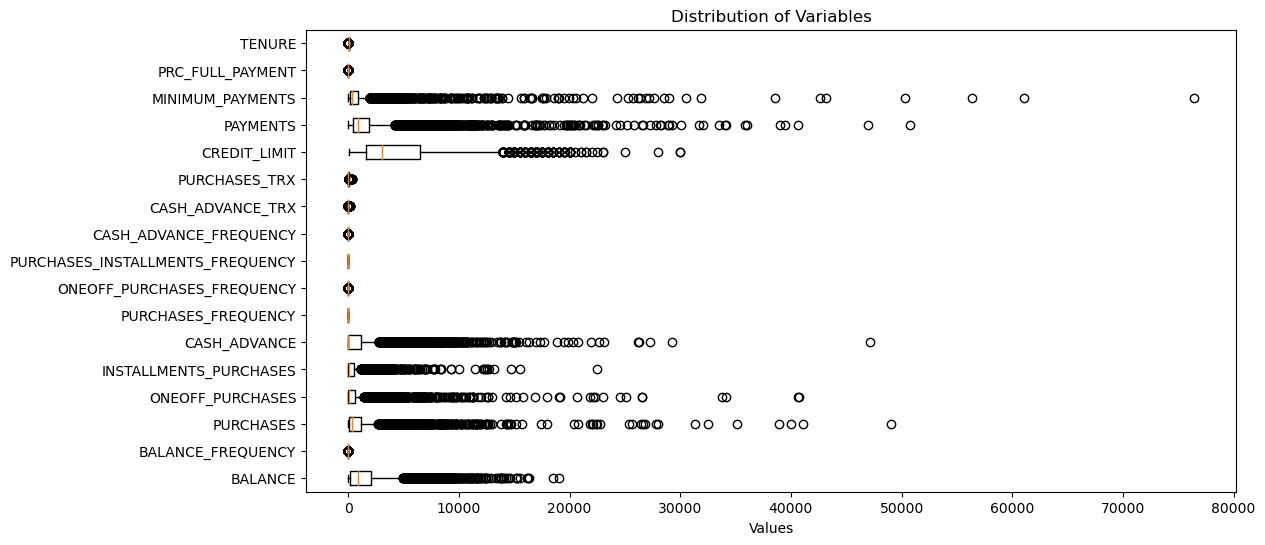

In [12]:
# plots a boxplot that summarizes the distribution of all the varaibles

# Select the columns you want to plot
columns_to_plot = [
    'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 
    'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 
    'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

# Create a list of data arrays for each column
data_to_plot = [dataset[col] for col in columns_to_plot]

# Create labels for the boxplot
labels = columns_to_plot

# Plot the boxplot
plt.figure(figsize=(12, 6))
plt.boxplot(data_to_plot, vert=False)
plt.yticks(range(1, len(labels) + 1), labels)
plt.xlabel("Values")
plt.title("Distribution of Variables")
plt.show()

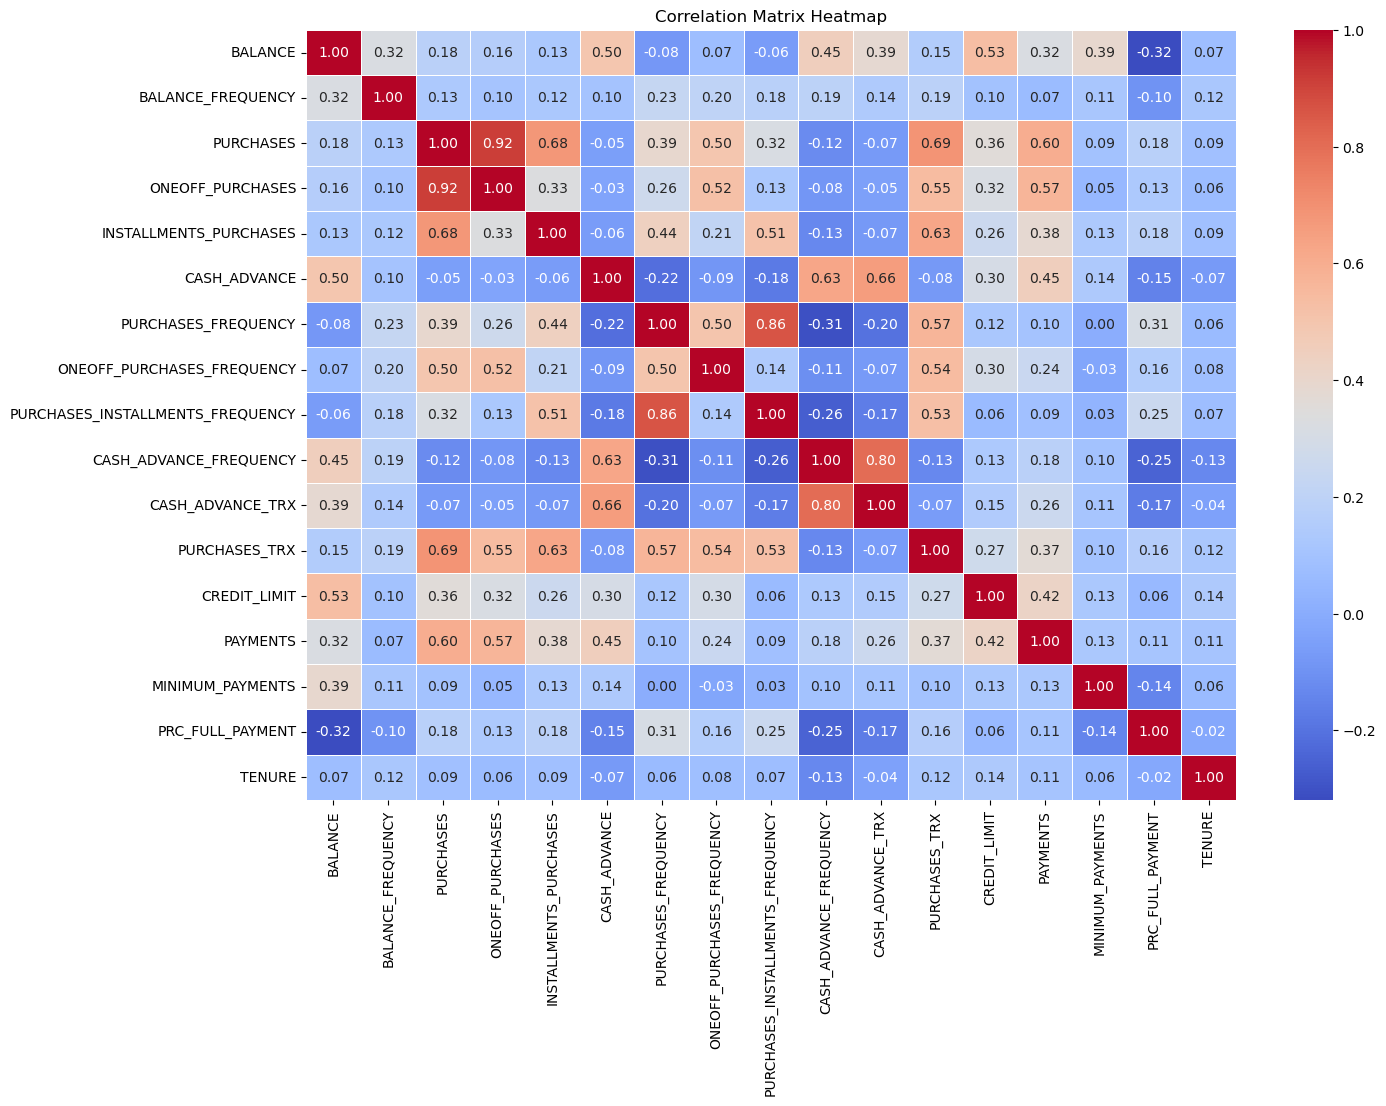

In [13]:
# calculates the correlation matrix for of the variables

corr = dataset.corr()

# plots the correlation matrix heat map for all the variables

plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

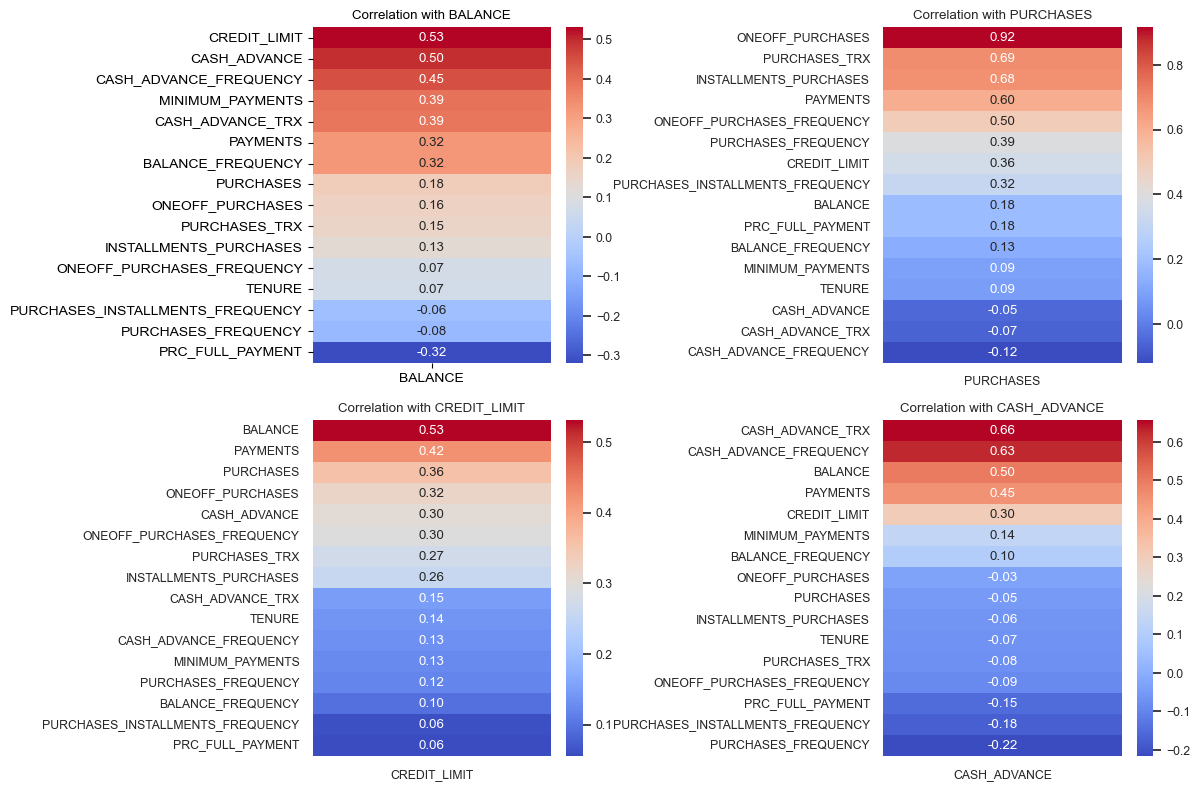

In [14]:
# find the correlation of some of the variables with other variables

def plot_target_correlation(target_variable, dataset):
    # Calculate the correlation with the target variable
    target_corr = corr[target_variable].drop(target_variable)

    # Sort correlation values in descending order
    target_corr_sorted = target_corr.sort_values(ascending=False)

    # Set up the plot
    sns.set(font_scale=0.8)
    sns.set_style("white")
    sns.set_palette("PuBuGn_d")
    
    # Create a heatmap of the correlations with the target column
    sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
    plt.title(f'Correlation with {target_variable}')

# Create a 2x2 grid of subplots
plt.figure(figsize=(12,8))

# Displays the correlaton of 'BALANCES' with other variables
plt.subplot(2, 2, 1)
plot_target_correlation('BALANCE', dataset)

# Displays the correlaton of 'PURCHASES' with other variables
plt.subplot(2, 2, 2)
plot_target_correlation('PURCHASES', dataset)

# Displays the correlaton of 'CREDIT_LIMIT' with other variables
plt.subplot(2, 2, 3)
plot_target_correlation('CREDIT_LIMIT', dataset)

# Displays the correlaton of 'CASH_ADVANCES' with other variables
plt.subplot(2, 2, 4)
plot_target_correlation('CASH_ADVANCE', dataset)

# Adjust the spacing of the subplots
plt.tight_layout()

# Show the subplots
plt.show()

# Data Preprocessing

In [15]:
# Scale the dataset
# import the StandardScaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Create a StandardScaler for standardization
ss = StandardScaler()
standardized_data = ss.fit_transform(dataset)

# Create a MinMaxScaler to further scale the standardized data to the range [0,1]
minmax_scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = minmax_scaler.fit_transform(standardized_data)

# Convert the scaled data to a Pandas DataFrame
X = pd.DataFrame(scaled_data, columns=dataset.columns)

# Display the first few rows of the standardized and scaled DataFrame
X.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.002148,0.818182,0.001945,0.000000,0.00424,0.000000,0.166667,0.000000,0.083333,0.000000,0.00000,0.005587,0.031720,0.003979,0.001826,0.000000,1.0
1,0.168169,0.909091,0.000000,0.000000,0.00000,0.136685,0.000000,0.000000,0.000000,0.166667,0.03252,0.000000,0.232053,0.080893,0.014034,0.222222,1.0
2,0.131026,1.000000,0.015766,0.018968,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.033520,0.248748,0.012264,0.008210,0.000000,1.0
3,0.087521,0.636364,0.030567,0.036775,0.00000,0.004366,0.083333,0.083333,0.000000,0.055555,0.00813,0.002793,0.248748,0.000000,0.011310,0.000000,1.0
4,0.042940,1.000000,0.000326,0.000393,0.00000,0.000000,0.083333,0.083333,0.000000,0.000000,0.00000,0.002793,0.038397,0.013374,0.003204,0.000000,1.0


# Principal Component Analysis

In [16]:
# reduce the dimensionality of the dataset and extract important features

from sklearn.decomposition import PCA

pca = PCA(n_components = 4)
principal_components = pca.fit_transform(X)

In [17]:
# sum the variances to know how much of the original variance is explained by the 5 dimensions extracted by PCA

print(pca.explained_variance_ratio_)
sum(pca.explained_variance_ratio_)

[0.49597206 0.14054044 0.12844489 0.07676572]


0.8417231100028217

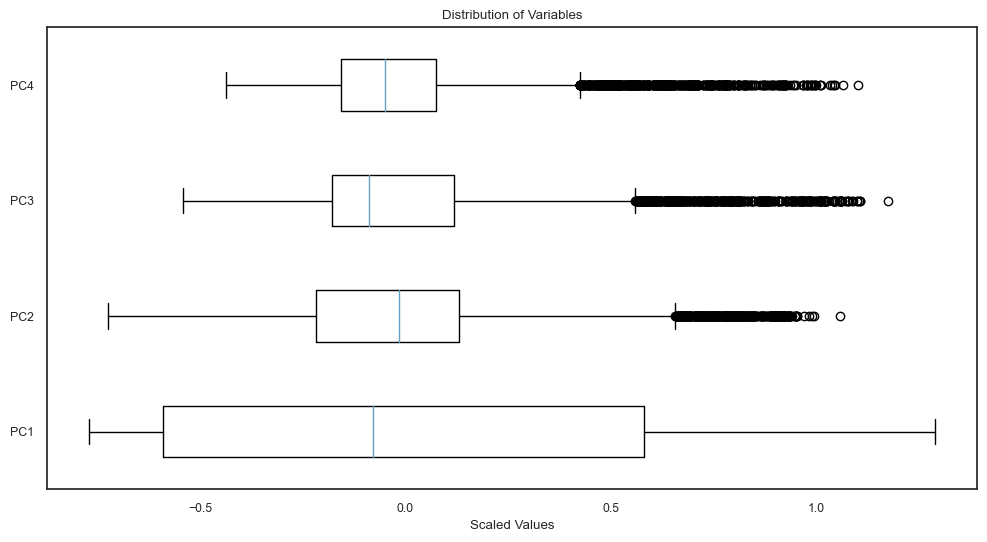

In [18]:
# plots a boxplot that summarizes the distribution extracted features

#convert to dataframe

principal_components_df = pd.DataFrame(data = principal_components, columns = ['PC1', 'PC2', 'PC3', 'PC4'])

# Select the columns you want to plot
columns_to_plot = ['PC1', 'PC2', 'PC3', 'PC4']

# Create a list of data arrays for each column
data_to_plot = [principal_components_df[col] for col in columns_to_plot]

# Create labels for the boxplot
labels = columns_to_plot

# Plot the boxplot
plt.figure(figsize=(12, 6))
plt.boxplot(data_to_plot, vert=False)
plt.yticks(range(1, len(labels) + 1), labels)
plt.xlabel("Scaled Values")
plt.title("Distribution of Variables")
plt.show()

# Clustering Algorithms - KMeans

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

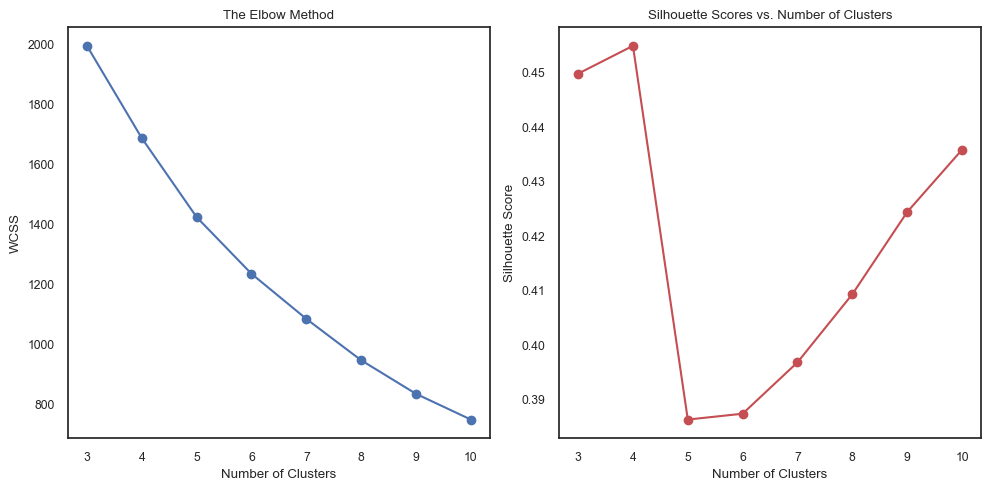

In [19]:
# Use the Elbow method to find the optimal number of clusters and also calculate the Silhouette scores of these clusters

from sklearn.cluster import KMeans # imports the KMeans algorithm
from sklearn.metrics import silhouette_score # imports Silhouette score metric

wcss = []
silhouette_scores = []
cluster_numbers = []

for i in range(3, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(principal_components)
    wcss.append(kmeans.inertia_)
    cluster_numbers.append(i)
    
    # Calculate silhouette score for the current k
    
    silhouette_avg = silhouette_score(principal_components, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

# Plot the WCSS values to find the "elbow" point
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(3, 11), wcss, marker='o', linestyle='-', color='b')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

# Plot the silhouette scores
plt.subplot(1, 2, 2)
plt.plot(range(3, 11), silhouette_scores, marker='o', linestyle='-', color='r')
plt.title('Silhouette Scores vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

In [20]:
# Create a DataFrame to display the silhouette scores results
KM_silhouette_score = pd.DataFrame({'Cluster Number': cluster_numbers, 'Silhouette Score': silhouette_scores})

# Round the Silhouette Score column to 3 decimal places
KM_silhouette_score['Silhouette Score'] = KM_silhouette_score['Silhouette Score'].round(3)

# Display the silhouette scores as a table
print(KM_silhouette_score)

   Cluster Number  Silhouette Score
0               3             0.450
1               4             0.455
2               5             0.386
3               6             0.387
4               7             0.397
5               8             0.409
6               9             0.424
7              10             0.436


In [21]:
# fit the KMeans model on the PCA extracted features

kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(principal_components)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


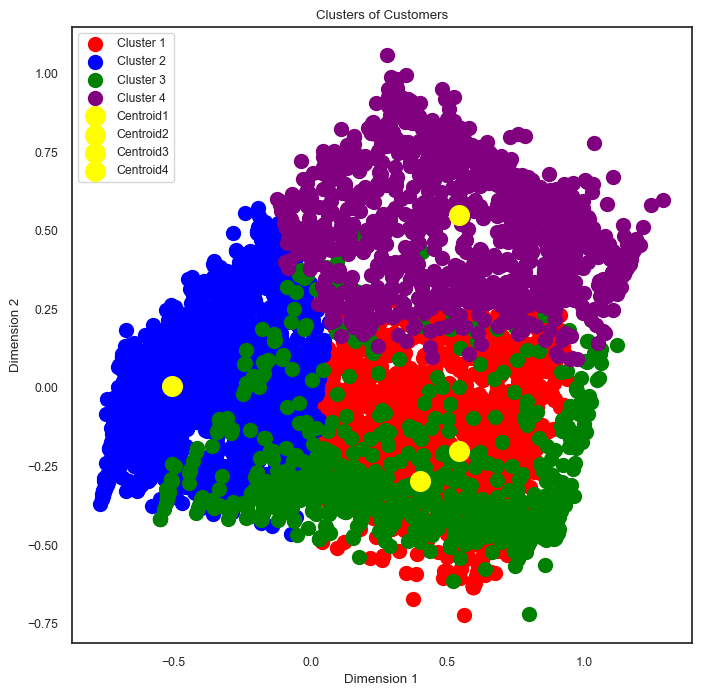

In [22]:
# Visualizing the KMeans clusters

# Define the colours of the cluster
colours = ['red', 'blue', 'green', 'purple']

# Plot the scatter plot with 2 PCA dimensions

plt.figure(figsize=(8,8))
for i in range(4):
    plt.scatter(principal_components[y_kmeans == i, 0], principal_components[y_kmeans == i, 1], 
                s = 100, c = colours[i], label = 'Cluster ' + str(i+1))
    
# Plot the centroid for each cluster
for i, centroid in enumerate(kmeans.cluster_centers_):
    plt.scatter(centroid[0], centroid[1], s = 200, c = 'yellow', label = 'Centroid' + str(i+1))
    
plt.title('Clusters of Customers')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

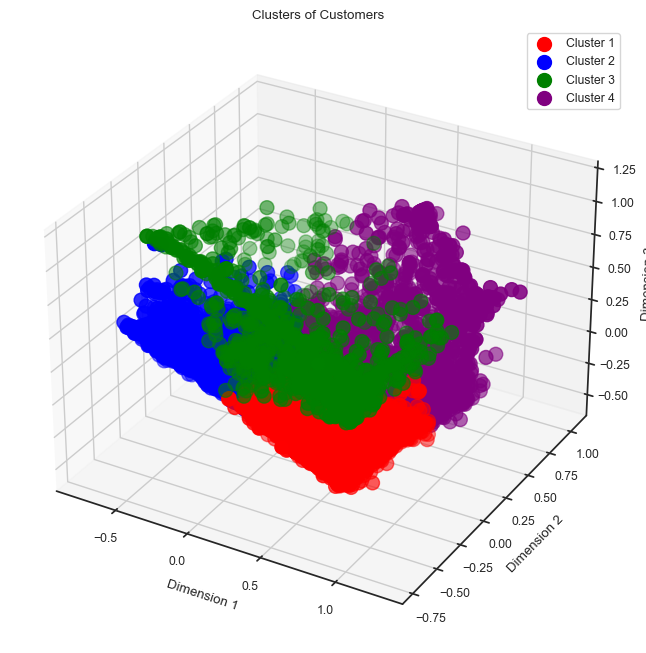

In [23]:
# Visualizing the KMeans clusters in 3D plot

# Define the colours of the cluster

from mpl_toolkits.mplot3d import Axes3D # import 'Axes3D' for 3D plot

colours = ['red', 'blue', 'green', 'purple']

# Create a 3D figure for 3 PCA dimensions
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

for i in range(4):
    ax.scatter(principal_components[y_kmeans == i, 0], principal_components[y_kmeans == i, 1], 
               principal_components[y_kmeans == i, 2],
               s=100, c=colours[i], label='Cluster ' + str(i+1))
    
ax.set_title('Clusters of Customers')
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')
plt.legend()
plt.show()

# Clustering Algorithms - Agglomerative

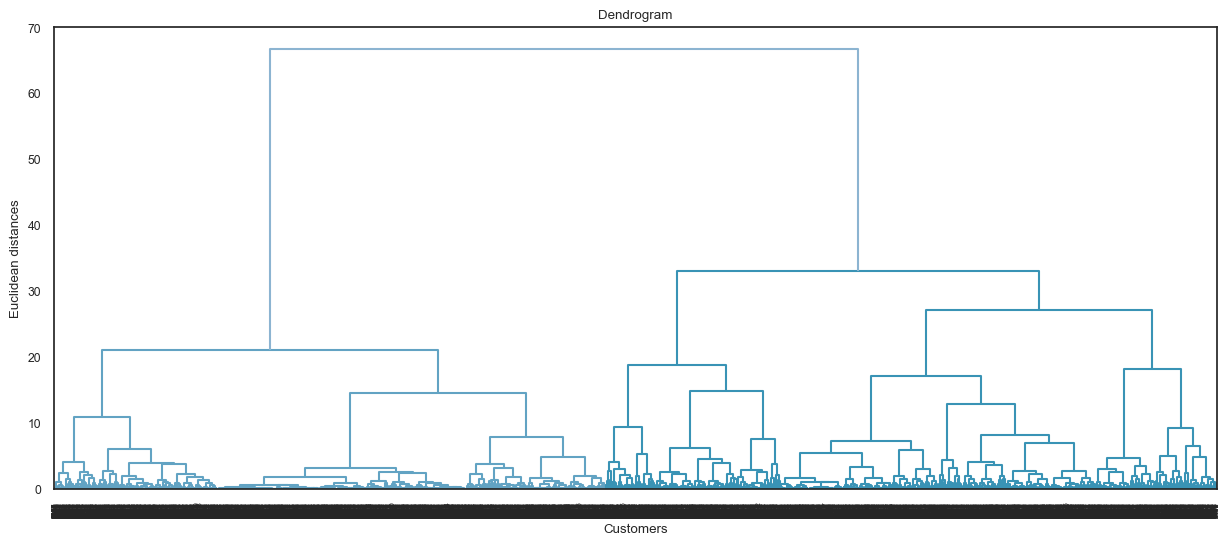

In [24]:
# Using the dendrogram to find the optimal number of clusters

import scipy.cluster.hierarchy as sch

# Plot the dendrogram of clusters

plt.figure(figsize = (15,6))
dendrogram = sch.dendrogram(sch.linkage(principal_components, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

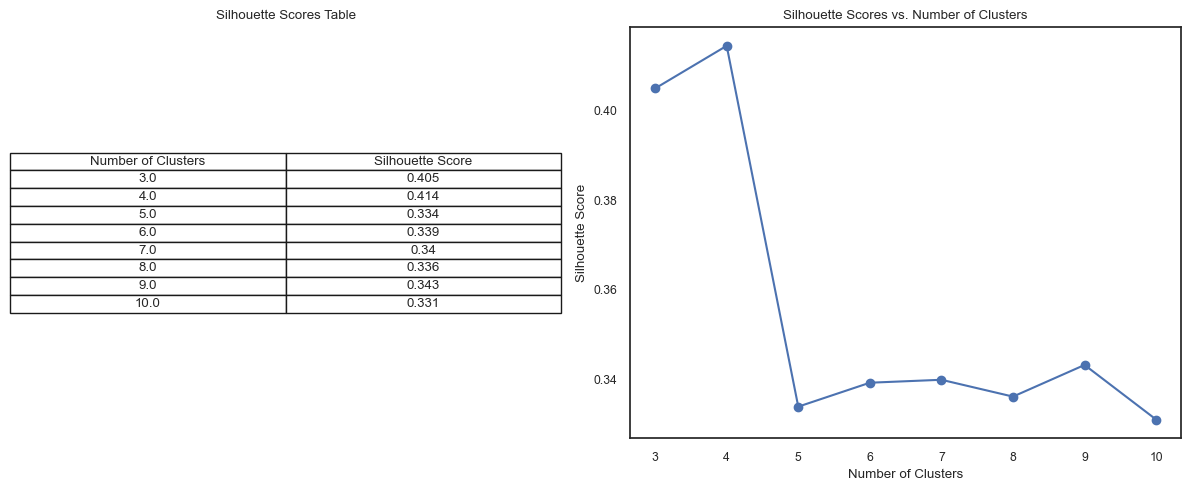

In [25]:
# calculates and plots the graph of the Silhouette scores for the Agglomerative clusters

from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

silhouette_scores = []

for n_clusters in range(3, 11):
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters)  # Use the current n_clusters value
    cluster_labels = agglomerative.fit_predict(principal_components)
    silhouette_avg = silhouette_score(principal_components, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Round the silhouette scores to 2 decimal places
rounded_scores = [round(score, 3) for score in silhouette_scores]

# Create a DataFrame to store the silhouette scores and corresponding number of clusters
results_df = pd.DataFrame({'Number of Clusters': range(3, 11), 'Silhouette Score': rounded_scores})

# Plot the silhouette scores
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)  # Create a subplot for the table
plt.axis('off')  # Turn off the axis for the table
plt.table(cellText=results_df.values, colLabels=results_df.columns, cellLoc='center', loc='center')
plt.title('Silhouette Scores Table')

plt.subplot(1, 2, 2)  # Create a subplot for the graph
plt.plot(range(3, 11), silhouette_scores, marker='o', linestyle='-', color='b')
plt.title('Silhouette Scores vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()  # Ensure the subplots do not overlap
plt.show()

In [26]:
# Fit the Agglomerative clustering to the PCA features

from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(principal_components)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


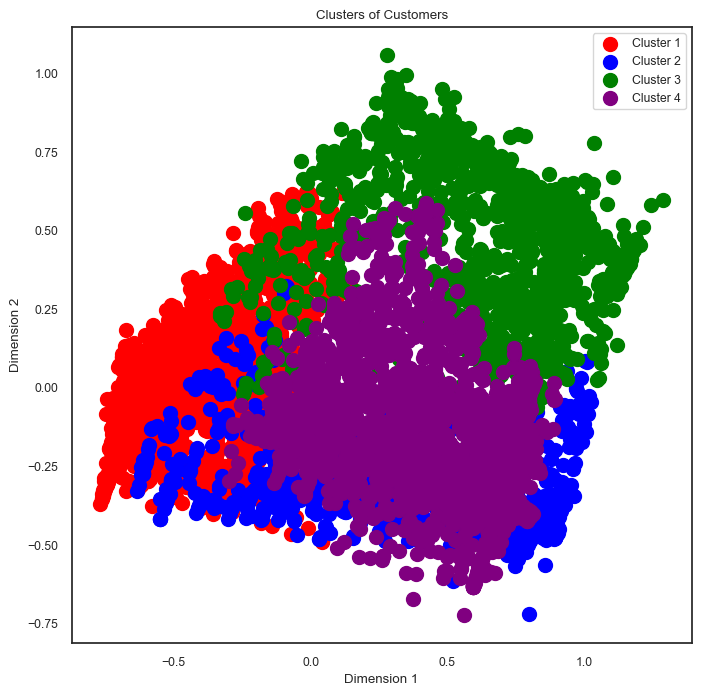

In [27]:
# Visualize the Agglomerative clusters in scatter plot

# Define cluster colors
colours = ['red', 'blue', 'green', 'purple']

# Plots a scatter plot of the first 2 PCA dimensions
plt.figure(figsize=(8,8))
for i in range(4):
    plt.scatter(principal_components[y_hc == i, 0], principal_components[y_hc == i, 1], 
                s = 100, c = colours[i], label = 'Cluster ' + str(i+1))

plt.title('Clusters of Customers')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

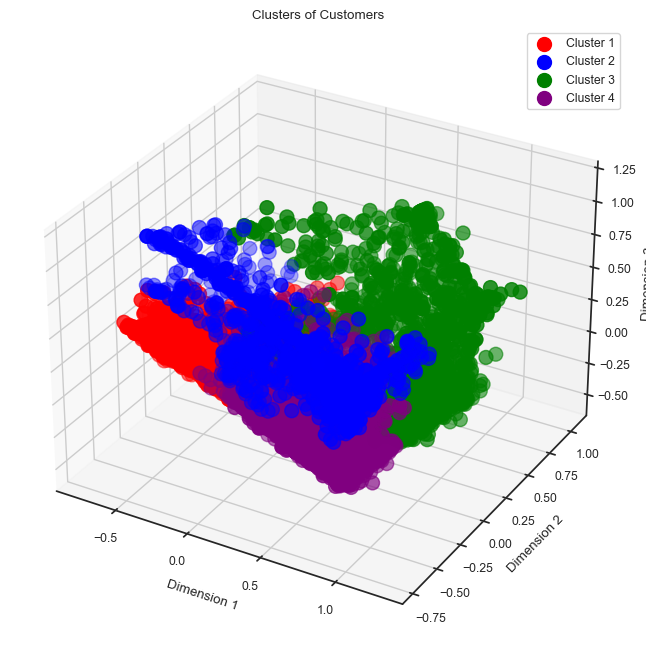

In [28]:
# Visualize the Agglomerative clusters in scatter plot

from mpl_toolkits.mplot3d import Axes3D # Import 'Axes3D' for 3D plot

# Define cluster colors
colours = ['red', 'blue', 'green', 'purple']

# Create a 3D figure
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

# Plots a scatter plot of the first 3 PCA dimensions
for i in range(4):
    ax.scatter(principal_components[y_hc == i, 0], principal_components[y_hc == i, 1], 
               principal_components[y_hc == i, 2],
               s=100, c=colours[i], label='Cluster ' + str(i+1))
    
ax.set_title('Clusters of Customers')
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')
plt.legend()
plt.show()

# Interpretation of clusters

In [29]:
# Create a copy of the dataset to assign the k-means clusters
km_cluster_dataset = dataset.copy()

# Assign cluster labels from kmeans clustering to the dataset
km_cluster_dataset["clusters"] = y_kmeans

# List of columns to calculate their means
columns = ['BALANCE', 'PURCHASES', 'PURCHASES_FREQUENCY', 'CREDIT_LIMIT']

# Calculate the means for the specified columns within each cluster
km_cluster_means = km_cluster_dataset.groupby('clusters')[columns].mean()

# Display the average value for selected columns within each cluster
km_cluster_means

,BALANCE,PURCHASES,PURCHASES_FREQUENCY,CREDIT_LIMIT
clusters,,,,
0,1549.320668,1183.243192,0.883549,4090.223231
1,1772.334981,283.948720,0.136321,4129.760628
2,102.500387,975.444007,0.700280,4166.416692
3,1898.188144,3245.099117,0.900982,6722.927557


In [30]:
# Create a copy of the dataset to assign the Agglomerative clusters
agg_cluster_dataset = dataset.copy()

# Assign cluster labels from Agglomerative clustering to the dataset
agg_cluster_dataset["clusters"] = y_hc

# List of columns calculate the means
columns = ['BALANCE', 'PURCHASES', 'PURCHASES_FREQUENCY', 'CREDIT_LIMIT']

# Calculate the means for the specified columns within each cluster
agg_cluster_means = agg_cluster_dataset.groupby('clusters')[columns].mean()

# Display the average value for selected columns within each cluster
agg_cluster_means

,BALANCE,PURCHASES,PURCHASES_FREQUENCY,CREDIT_LIMIT
clusters,,,,
0,1822.318420,286.960016,0.124260,4139.964469
1,95.655246,809.728542,0.667607,3940.664801
2,1907.334906,3325.975942,0.925404,6848.876885
3,1484.649245,1050.549569,0.822716,4030.221965
